In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,f1_score,r2_score,roc_curve,roc_auc_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import tree,linear_model
import missingno as mn
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline

In [0]:
df = pd.read_csv('Weather Forecast Training.csv')
df_test = pd.read_csv("Weather Forecast Testing.csv")

# Exploratory Data Analysis

**EDA shows the distribution of the different attributes as well as the presence of missing values**

## Training Data

In [5]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir,WindSpeed,Humidity,Pressure,Cloud,Temp,RainToday,RainTomorrow
0,NorahHead,18.9,23.7,0.0,NaN,NaN,SSE,41.0,SSE,28.0,55.0,1026.0,NaN,22.4,No,Yes
1,Nuriootpa,11.1,20.8,0.0,4.8,8.3,W,39.0,WSW,26.0,48.0,1014.4,7.0,19.5,No,No
2,GoldCoast,15.9,19.5,17.6,NaN,NaN,SE,44.0,SW,9.0,99.0,1028.5,NaN,17.8,Yes,Yes
3,Bendigo,0.0,14.9,0.0,NaN,NaN,WSW,35.0,WNW,19.0,55.0,1023.0,4.0,14.2,No,Yes
4,Walpole,9.1,22.7,0.0,NaN,NaN,NNE,41.0,ESE,7.0,40.0,1027.1,NaN,22.5,No,No


In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,Temp
count,51694.000000,51849.000000,51231.000000,29425.000000,27103.000000,48407.000000,50954.000000,50549.000000,46912.000000,31848.000000,50915.000000
mean,12.549174,22.512698,3.639494,5.177570,6.530580,42.003016,19.092299,57.432214,1014.273338,5.175647,20.845623
std,6.376746,7.113064,11.009628,4.017662,3.946561,14.627024,9.157505,21.833045,7.278733,2.632166,6.938471
min,-8.000000,-4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,977.100000,0.000000,-4.400000
25%,7.900000,17.200000,0.000000,2.400000,3.200000,31.000000,13.000000,42.000000,1009.300000,3.000000,15.700000
50%,12.300000,21.800000,0.000000,4.400000,6.900000,39.000000,19.000000,58.000000,1014.200000,6.000000,20.200000
75%,17.200000,27.500000,2.200000,7.000000,9.900000,50.000000,24.000000,73.000000,1019.200000,7.000000,25.600000
max,31.400000,47.000000,371.000000,77.300000,14.500000,135.000000,83.000000,100.000000,1037.800000,8.000000,46.100000


In [7]:
df.shape

(51978, 16)

In [8]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,Temp
MinTemp,1.000000,0.741093,0.128947,0.459432,0.027024,0.125284,0.118110,0.025376,-0.385755,0.026228,0.708831
MaxTemp,0.741093,1.000000,-0.061291,0.580469,0.440606,0.012907,0.014354,-0.493495,-0.330565,-0.287222,0.979679
Rainfall,0.128947,-0.061291,1.000000,-0.062057,-0.238116,0.147924,0.061838,0.270408,-0.132772,0.177181,-0.063232
Evaporation,0.459432,0.580469,-0.062057,1.000000,0.332020,0.162055,0.107010,-0.373830,-0.238732,-0.188644,0.560314
Sunshine,0.027024,0.440606,-0.238116,0.332020,1.000000,-0.068554,0.060990,-0.665971,0.049455,-0.727811,0.466484
WindGustSpeed,0.125284,0.012907,0.147924,0.162055,-0.068554,1.000000,0.672465,0.023886,-0.413694,0.126906,-0.028852
WindSpeed,0.118110,0.014354,0.061838,0.107010,0.060990,0.672465,1.000000,-0.001789,-0.233156,0.012676,-0.004612
Humidity,0.025376,-0.493495,0.270408,-0.373830,-0.665971,0.023886,-0.001789,1.000000,-0.018034,0.569979,-0.552677
Pressure,-0.385755,-0.330565,-0.132772,-0.238732,0.049455,-0.413694,-0.233156,-0.018034,1.000000,-0.118259,-0.286400
Cloud,0.026228,-0.287222,0.177181,-0.188644,-0.727811,0.126906,0.012676,0.569979,-0.118259,1.000000,-0.334765


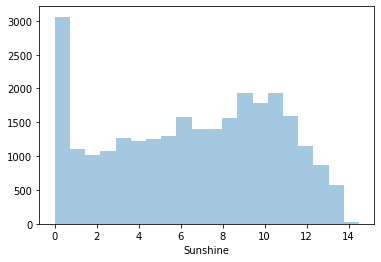

In [9]:
sns.distplot(df['Sunshine'].dropna(),kde = False,bins = 20)

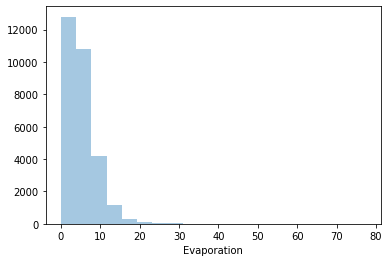

In [10]:
sns.distplot(df['Evaporation'].dropna(),kde = False,bins = 20)

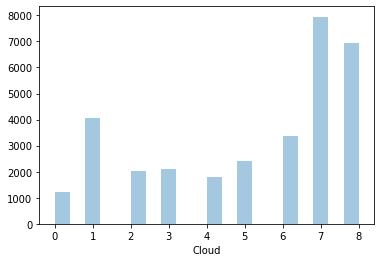

In [11]:
sns.distplot(df['Cloud'].dropna(),kde = False,bins = 20)

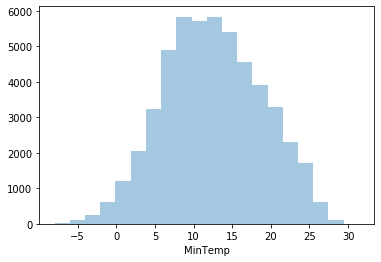

In [12]:
sns.distplot(df['MinTemp'].dropna(),kde = False,bins = 20)

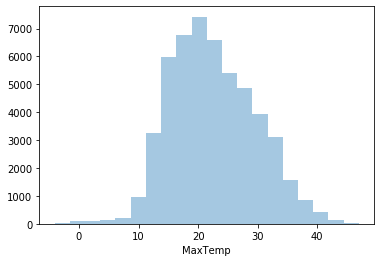

In [13]:
sns.distplot(df['MaxTemp'].dropna(),kde = False,bins = 20)

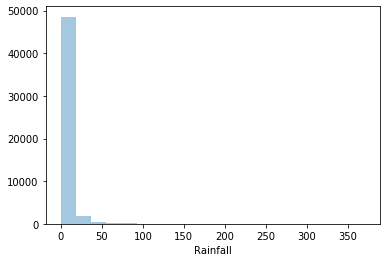

In [14]:
sns.distplot(df['Rainfall'].dropna(),kde = False,bins = 20)

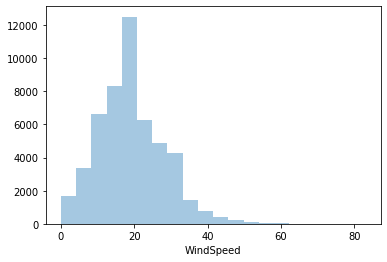

In [15]:
sns.distplot(df['WindSpeed'].dropna(),kde = False,bins = 20)

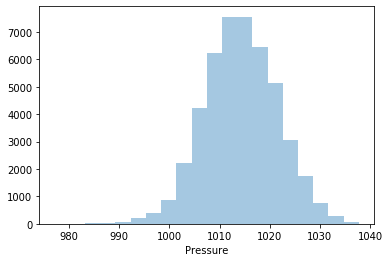

In [16]:
sns.distplot(df['Pressure'].dropna(),kde = False,bins = 20)

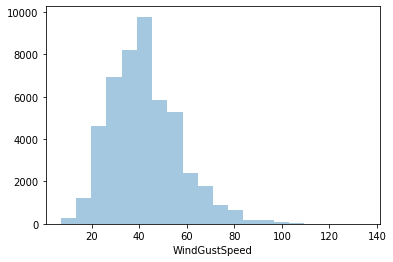

In [17]:
sns.distplot(df['WindGustSpeed'].dropna(),kde = False,bins = 20)

## Handling Missing Values

**The dataframe contains a large number of missing values. The majority of fields have a small percentage of missing values, these can be dealt with by imputing the median value for each location. The median value at a certain location is a good indicator for missing values at that location because conditions tend to be similar at a given location.**

**In certain cases, some locations do not have any values for a particular attribute.In these cases there is probably a data collection issues at those specific locations. In these cases we fill missing values with the median of the entire column.**

**Temperature and Humidity have high correlations with some of the other attributes, therefore linear regression can be used to impute the values**

**The sunshine,cloud and evaporation attributes can be dropped because nearly 50 percent of observations are missing**

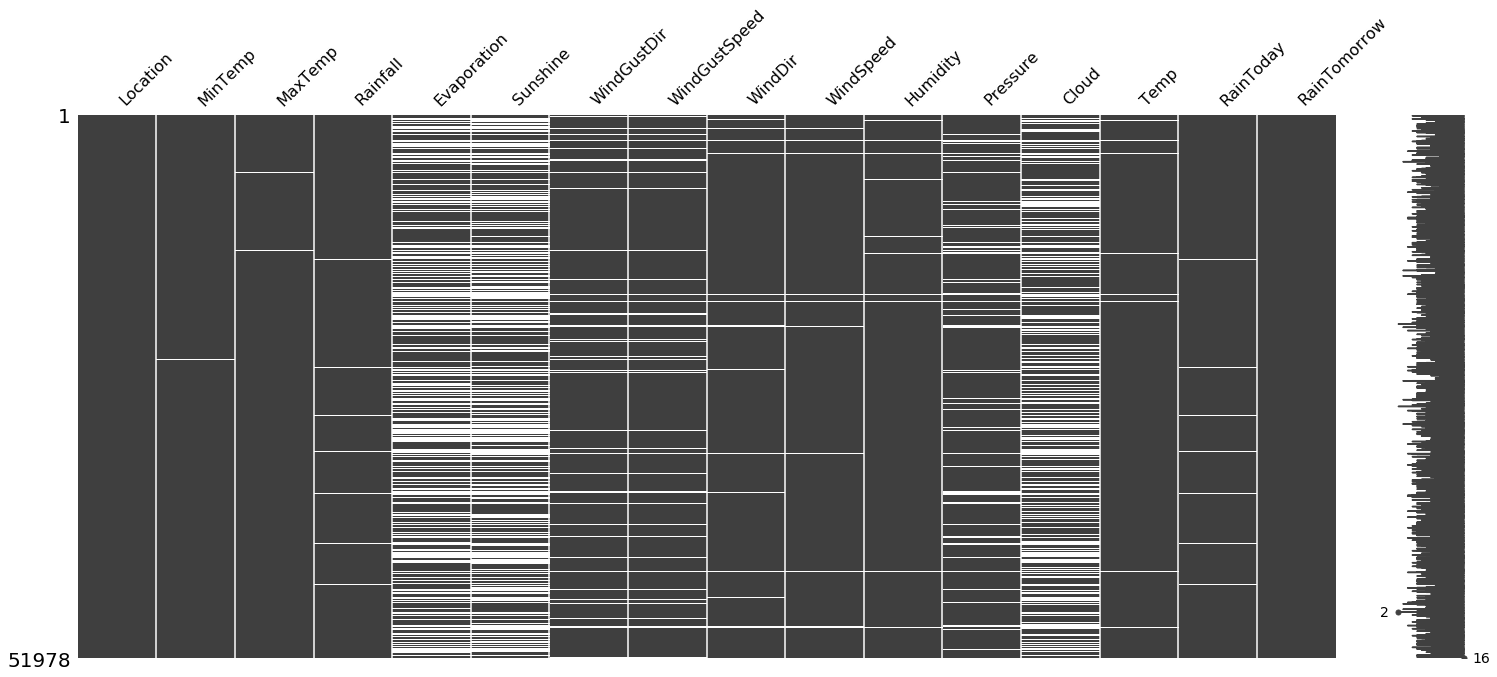

In [18]:
mn.matrix(df)
plt.show()

In [19]:
df.isna().sum()

Location             0
MinTemp            284
MaxTemp            129
Rainfall           747
Evaporation      22553
Sunshine         24875
WindGustDir       3598
WindGustSpeed     3571
WindDir           1513
WindSpeed         1024
Humidity          1429
Pressure          5066
Cloud            20130
Temp              1063
RainToday          747
RainTomorrow         0
dtype: int64

In [0]:
def impute_locmedian(col_names):
    for col_name in col_names:
        df[col_name]=df.groupby('Location')[col_name].apply(lambda x:x.fillna(x.median()))

In [0]:
def impute_median(col_names):
    for col_name in col_names:
        rownum = df[df[col_name].isna()].index
        df.at[rownum,col_name] = df[col_name].median()

In [0]:
impute_locmedian(['MinTemp','MaxTemp','Rainfall','WindSpeed','Pressure','WindGustSpeed'])

In [0]:
impute_median(['Pressure','WindGustSpeed'])

In [0]:
df.drop(['Evaporation','Sunshine','Cloud'],axis = 1,inplace=True)

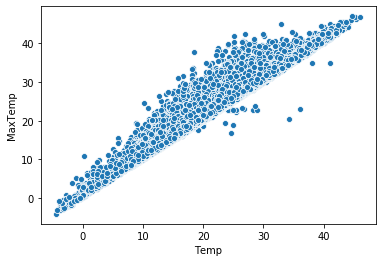

In [25]:
sns.scatterplot(x = 'Temp',y = 'MaxTemp',data = df)

In [26]:
model = linear_model.LinearRegression()
model.fit(X = df.dropna(how = 'any')[['MaxTemp','MinTemp']], y = df.dropna(how = 'any')['Temp'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
r2_score(df.dropna(how = 'any')['Temp'],model.predict(df.dropna(how = 'any')[['MaxTemp','MinTemp']]))

0.9612217001413683

In [0]:
df.loc[df['Temp'].isna(),'Temp'] = model.predict(df[df['Temp'].isna()][['MaxTemp','MinTemp']])

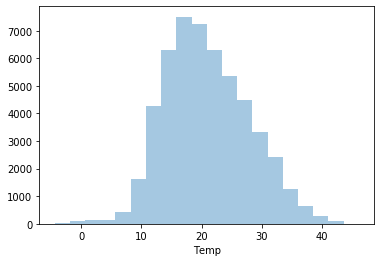

In [29]:
sns.distplot(df['Temp'].dropna(),kde = False,bins = 20)

In [0]:
def create_multiple_dummies(col_name):
    tempdf = pd.get_dummies(df[col_name])
    tempdf.columns = [col_name +'_' + str(col) for col in tempdf.columns]
    return tempdf

In [0]:
df['RainToday'] = pd.get_dummies(df['RainToday'],drop_first=True)

In [32]:
df[df['RainToday'].isna()].sum().sum()

0.0

In [0]:
df['RainToday'] = df['RainToday'].astype(int)

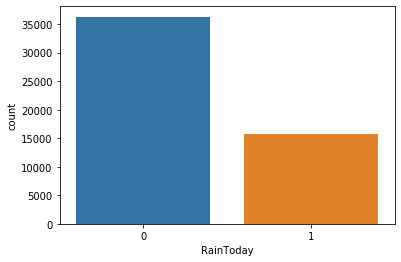

In [34]:
sns.countplot('RainToday',data = df)

In [0]:
df['RainTomorrow'] = pd.get_dummies(df['RainTomorrow'],drop_first=True)

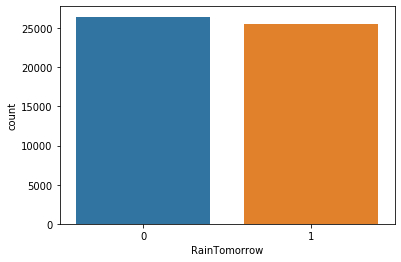

In [36]:
sns.countplot('RainTomorrow',data = df)

In [0]:
X=df.dropna()[['MinTemp','MaxTemp','Temp','WindGustSpeed','RainToday']]
y=df.dropna()['Humidity']

model = linear_model.LinearRegression().fit(X, y)

In [38]:
r2_score(df.dropna(how = 'any')['Humidity'],model.predict(df.dropna(how = 'any')[['MinTemp','MaxTemp','Temp','WindGustSpeed','RainToday']]))

0.6905157800869262

In [0]:
df.loc[df['Humidity'].isna(),'Humidity'] = model.predict(df[df['Humidity'].isna()][['MinTemp','MaxTemp','Temp','WindGustSpeed','RainToday']])

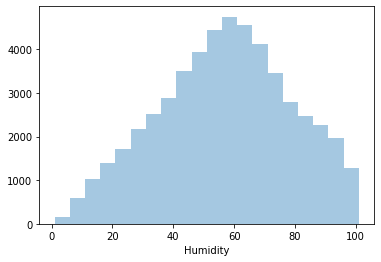

In [40]:
sns.distplot(df['Humidity'],kde = False,bins = 20)

In [0]:
WindGustDirdum = create_multiple_dummies('WindGustDir')
df_cluster = df.drop('WindGustDir',axis = 1).join(WindGustDirdum)
df.drop('WindGustDir',axis = 1,inplace = True)

In [0]:
WindDirdum = create_multiple_dummies('WindDir')
df_cluster = df_cluster.drop('WindDir',axis = 1).join(WindDirdum)
df.drop('WindDir',axis = 1,inplace = True)

In [0]:
locationdum = create_multiple_dummies('Location')
df_cluster = df_cluster.drop('Location',axis = 1).join(locationdum)
df.drop('Location',axis = 1,inplace = True)

In [0]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df_cluster)

In [45]:
df_normalized = pd.DataFrame(np_scaled, columns=df_cluster.columns, index=df_cluster.index)
df_normalized.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed,Humidity,Pressure,Temp,RainToday,RainTomorrow,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir_E,WindDir_ENE,WindDir_ESE,WindDir_N,WindDir_NE,WindDir_NNE,WindDir_NNW,WindDir_NW,WindDir_S,WindDir_SE,WindDir_SSE,WindDir_SSW,WindDir_SW,WindDir_W,...,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,0.682741,0.544031,0.000000,0.265625,0.337349,0.539841,0.805601,0.531002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.484772,0.487280,0.000000,0.250000,0.313253,0.469861,0.614498,0.473614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.606599,0.461840,0.047439,0.289062,0.108434,0.979711,0.846787,0.439972,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.203046,0.371820,0.000000,0.218750,0.228916,0.539841,0.756178,0.368732,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.434010,0.524462,0.000000,0.265625,0.084337,0.389885,0.823723,0.532980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Test Data

In [0]:
def impute_locmediantest(col_names):
    for col_name in col_names:
        df_test[col_name]=df_test.groupby('Location')[col_name].apply(lambda x:x.fillna(x.median()))

In [0]:
def impute_mediantest(col_names):
    for col_name in col_names:
        rownum = df_test[df_test[col_name].isna()].index
        df_test.at[rownum,col_name] = df_test[col_name].median()

In [0]:
def create_multiple_dummies_test(col_name):
    tempdf = pd.get_dummies(df_test[col_name])
    tempdf.columns = [col_name +'_' + str(col) for col in tempdf.columns]
    return tempdf

In [49]:
df_test.head()

,ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir,WindSpeed,Humidity,Pressure,Cloud,Temp,RainToday
0,1,Perth,15.3,21.5,4.4,2.4,1.4,NW,70.0,W,22.0,69.0,997.6,7.0,19.8,Yes
1,2,Portland,7.1,11.0,38.8,1.2,5.8,SSE,48.0,SW,19.0,46.0,1014.0,4.0,10.7,Yes
2,3,Hobart,3.6,16.6,0.2,2.8,9.3,NW,37.0,N,15.0,48.0,1016.6,5.0,15.4,No
3,4,Woomera,17.6,37.4,0.0,34.0,NaN,NNW,37.0,NW,19.0,11.0,1010.4,2.0,34.6,No
4,5,Townsville,11.4,25.6,0.0,6.0,2.8,ESE,31.0,SSE,13.0,52.0,1016.4,7.0,24.3,No


In [50]:
df_test.shape

(12994, 16)

In [51]:
df_test.isna().sum()

ID                  0
Location            0
MinTemp            47
MaxTemp            18
Rainfall          161
Evaporation      5516
Sunshine         6094
WindGustDir       929
WindGustSpeed     920
WindDir           387
WindSpeed         261
Humidity          349
Pressure         1293
Cloud            5020
Temp              267
RainToday         161
dtype: int64

In [0]:
df_test.drop(['Evaporation','Sunshine','Cloud'],axis = 1,inplace=True)

In [0]:
impute_locmediantest(['MinTemp','MaxTemp','Rainfall','WindSpeed','Pressure','WindGustSpeed'])

In [0]:
impute_mediantest(['Pressure','WindGustSpeed'])

In [0]:
WindGustDirdum = create_multiple_dummies_test('WindGustDir')
df_tree_test = df_test.drop('WindGustDir',axis = 1).join(WindGustDirdum)
df_test.drop('WindGustDir',axis = 1,inplace = True)

In [0]:
WindDirdum = create_multiple_dummies_test('WindDir')
df_tree_test = df_test.drop('WindDir',axis = 1).join(WindDirdum)
df_test.drop('WindDir',axis = 1,inplace = True)

In [0]:
df_test['RainToday'] = pd.get_dummies(df_test['RainToday'],drop_first=True)

In [58]:
df_test[df_test['RainToday'].isna()].sum().sum()

0.0

In [0]:
df_test['RainToday'] = df_test['RainToday'].astype(int)

In [0]:
locationdum = create_multiple_dummies_test('Location')
df_tree_test = df_test.drop('Location',axis = 1).join(locationdum)
df_test.drop('Location',axis = 1,inplace = True)

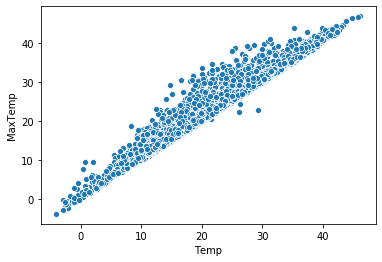

In [61]:
sns.scatterplot(x = 'Temp',y = 'MaxTemp',data = df_test)

In [62]:
model = linear_model.LinearRegression()
model.fit(X = df_test.dropna(how = 'any')[['MaxTemp','MinTemp']], y = df_test.dropna(how = 'any')['Temp'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
r2_score(df_test.dropna(how = 'any')['Temp'],model.predict(df_test.dropna(how = 'any')[['MaxTemp','MinTemp']]))

0.9600906679408381

In [0]:
df_test.loc[df_test['Temp'].isna(),'Temp'] = model.predict(df_test[df_test['Temp'].isna()][['MaxTemp','MinTemp']])

In [0]:
X=df_test.dropna()[['MinTemp','MaxTemp','Temp','WindGustSpeed','RainToday']]
y=df_test.dropna()['Humidity']

model = linear_model.LinearRegression().fit(X, y)

In [66]:
r2_score(df_test.dropna(how = 'any')['Humidity'],model.predict(df_test.dropna(how = 'any')[['MinTemp','MaxTemp','Temp','WindGustSpeed','RainToday']]))

0.6872842737724721

In [0]:
df_test.loc[df_test['Humidity'].isna(),'Humidity'] = model.predict(df_test[df_test['Humidity'].isna()][['MinTemp','MaxTemp','Temp','WindGustSpeed','RainToday']])

In [68]:
df_test.shape

(12994, 10)

In [0]:
np_scaled_test = min_max_scaler.fit_transform(df_test)

In [0]:
df_normalized_test = pd.DataFrame(np_scaled_test, columns=df_test.columns, index=df_test.index)

In [71]:
df_normalized_test.head()

,ID,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed,Humidity,Pressure,Temp,RainToday
0,0.000000,0.602210,0.498024,0.011970,0.492188,0.252874,0.701997,0.305263,0.475149,1.0
1,0.000077,0.375691,0.290514,0.105550,0.320312,0.218391,0.480899,0.592982,0.294235,1.0
2,0.000154,0.279006,0.401186,0.000544,0.234375,0.172414,0.500125,0.638596,0.387674,0.0
3,0.000231,0.665746,0.812253,0.000000,0.234375,0.218391,0.144444,0.529825,0.769384,0.0
4,0.000308,0.494475,0.579051,0.000000,0.187500,0.149425,0.538576,0.635088,0.564612,0.0


# Data Modelling

**The evaluation metric to be optimized is recall. The goal is to try and mininmize False Negatives, since it's better to predict that it will rain tomorrow and have that be false than to predict that it won't and have someone get caught in the rain**

## K-Means

**We can repurpose the K-Means algorithm for classification by creating 2 clusters where one cluster denotes RainTomorrow = Yes and the other cluster denotes RainTomorrow = No. All categorical variables have been dropped for the K-Means model because K-Means assumes continuous numeric variables and adding dummies can skew the results**

**Additionally, the model works better with unscaled data. This is because attributes like Pressure which have a high impact on the value of RainTomorrow, therefore it's better to assign higher weight to those variables**

In [0]:
X = df.drop(['RainTomorrow','RainToday'],axis = 1)
y = df['RainTomorrow']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Although the elbow method isn't necessary as we're using K-Means for binary classification, in this instance, it aligns with our chosen value of k=2**

In [0]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_train)
    distortions.append(kmeanModel.inertia_)

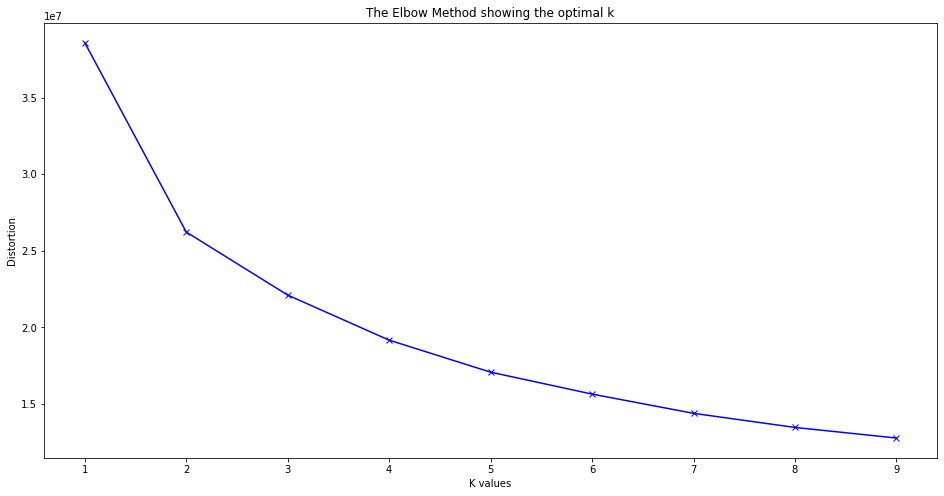

In [75]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('K values')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Hyperparameters

**The below K-Means model returned the best results with a recall of 0.76 and an accuracy of 0.72. The below parameters were used**

- **The number of clusters is 2 because the model is used for binary classification.**

- **The n_init parameter is the number of time the k-means algorithm will be run with different centroid seeds**

- **The max_iter parameter is the maximum number of iterations of the k-means algorithm for a single run.**

In [76]:
kmeans = KMeans(n_clusters=2,n_init=25, max_iter=100)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=25, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
pred = kmeans.predict(X_test)

In [78]:
print(classification_report(y_test,pred))
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.75      0.68      0.71      7872
           1       0.70      0.76      0.73      7722

    accuracy                           0.72     15594
   macro avg       0.72      0.72      0.72     15594
weighted avg       0.72      0.72      0.72     15594



Predicted,0,1,All
True,,,
0,5368,2504,7872
1,1828,5894,7722
All,7196,8398,15594


**Finally we've plotted an ROC curve with an AUC of 0.722**

In [0]:
fpr,tpr,_ = roc_curve(y_test,pred)

AUC:0.7225921661897271


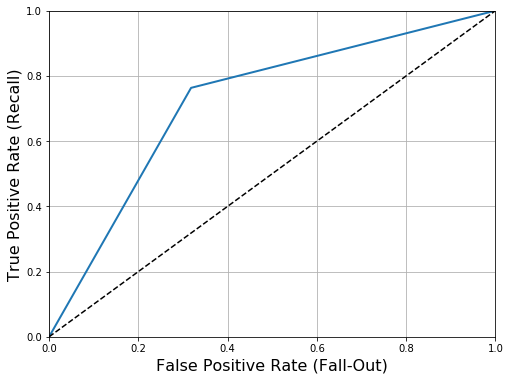

In [80]:
def plot_roc_curve(fpr, tpr, label=None):

    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])                                   
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
    plt.grid(True)  
    

plt.figure(figsize=(8, 6))                     
plot_roc_curve(fpr, tpr)
print("AUC:{}".format(roc_auc_score(y_test, pred)))
plt.show()

## Decision Trees

**The baseline model for decision tree returns a recall of 0.68 and an accuracy of 0.69**

In [0]:
X = df_cluster.drop('RainTomorrow',axis = 1)
y = df_cluster['RainTomorrow']

In [82]:
df.shape

(51978, 10)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [0]:
def dec_tree(X_train,y_train):
    dtree = DecisionTreeClassifier()
    return dtree.fit(X_train,y_train)

In [85]:
dtree = dec_tree(X_train,y_train)
dtree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
predictions = dtree.predict(X_test)

In [87]:
print(classification_report(y_test,predictions))
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      7872
           1       0.71      0.70      0.70      7722

    accuracy                           0.71     15594
   macro avg       0.71      0.71      0.71     15594
weighted avg       0.71      0.71      0.71     15594



Predicted,0,1,All
True,,,
0,5658,2214,7872
1,2346,5376,7722
All,8004,7590,15594


## Optimization

**The following grid search returns the hyperparameters whic provide the best results with a recall of 0.74 and an accuracy of 0.76**

**The hyperparameters tuned are**

- **The criterion chosen is gini, gini uses the gini index to measure the quality of a split. The formula for gini coefficient is as follows:**

$$1 - \sum_{i}^{|Classes|} P^2$$
- **The max_depth of the decision tree is the maximum number of levels that the decision tree can have**
- **The max leaf nodes parameter builds a tree with the n best nodes in terms of reduction in impurity**

In [88]:
param_grid = {'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 10, 20],
              'max_depth': [5, 10, 20, 25, 30],
              'min_samples_leaf': [1, 5, 10],
              'max_leaf_nodes': list(range(25,50))}
gs = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='recall',cv = 6)
gs.fit(X_train, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [89]:
print(gs.best_score_)

0.7365857541520446


In [90]:
for hps, values in gs.best_params_.items():
    print(f"{hps}: {values}")

criterion: gini
max_depth: 5
max_leaf_nodes: 26
min_samples_leaf: 1
min_samples_split: 2


In [91]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth=5,max_leaf_nodes=26)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=26,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [92]:
predictions = dtree.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[6135 1737]
 [2017 5705]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.77      7872
           1       0.77      0.74      0.75      7722

    accuracy                           0.76     15594
   macro avg       0.76      0.76      0.76     15594
weighted avg       0.76      0.76      0.76     15594



## ROC Curve

**The ROC Curve can be seen below, it has an AUC value of 0.835**

No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.835


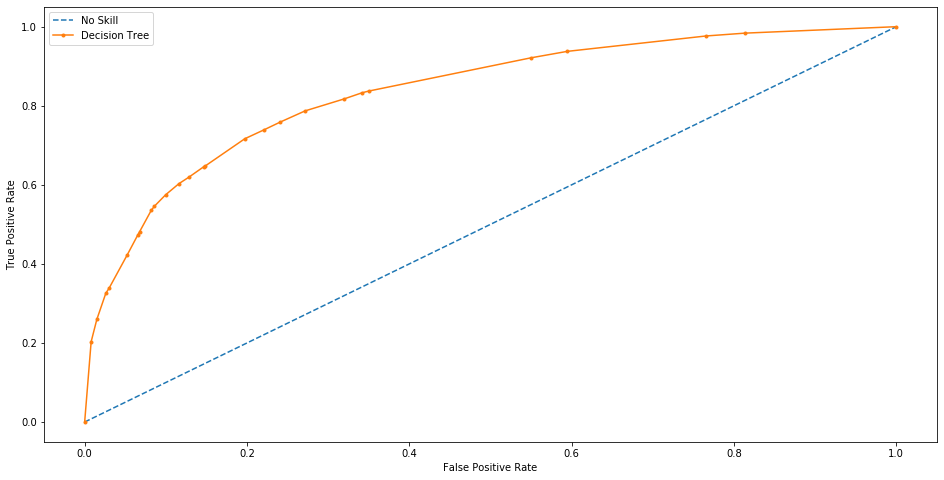

In [93]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = dtree.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.figure(figsize=(16,8))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

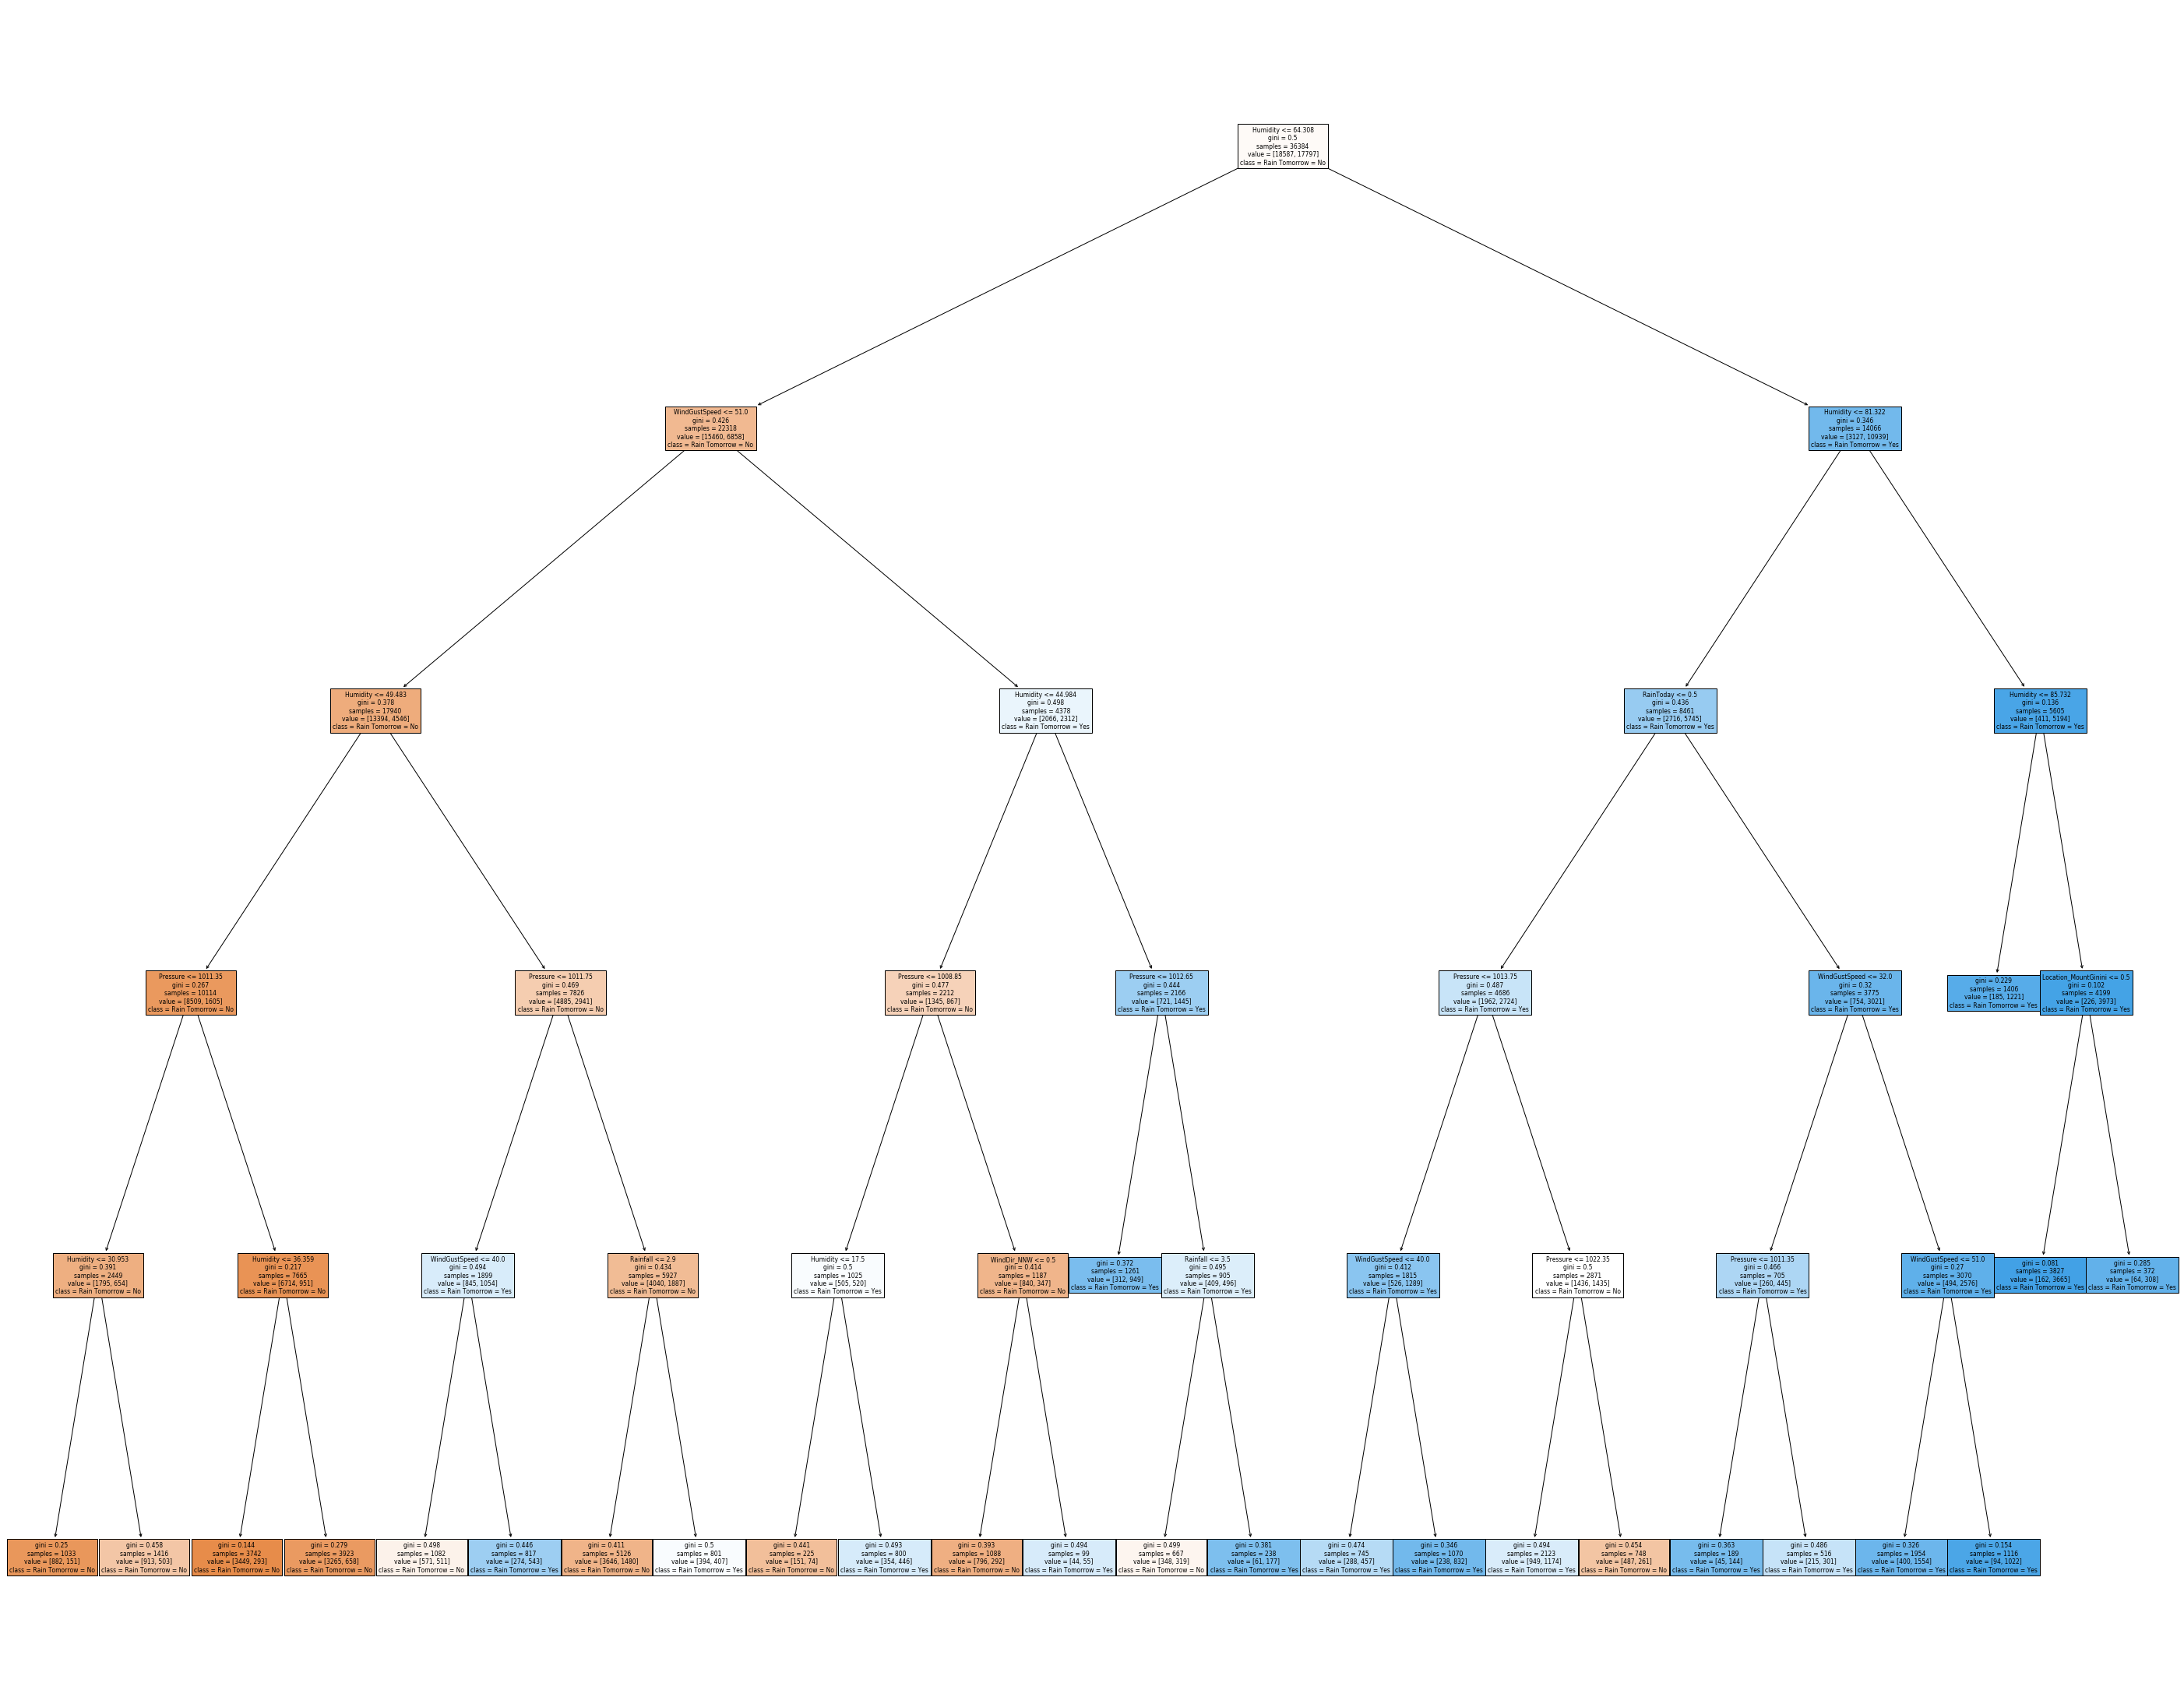

In [94]:
plt.figure(figsize = (50,40))
tree.plot_tree(dtree,filled = True,feature_names=X.columns,class_names=['Rain Tomorrow = No','Rain Tomorrow = Yes'])
plt.show()

## Hierarchical Agglomerative Clustering

**We can repurpose the HAC algorithm for classification by creating 2 clusters where one cluster denotes RainTomorrow = Yes and the other cluster denotes RainTomorrow = No. All categorical variables have been dropped for the HAC model because HAC assumes continuous numeric variables and adding dummies can skew the results**

**Additionally, the model works better with unscaled data. This is because attributes like Pressure which have a high impact on the value of RainTomorrow, therefore it's better to assign higher weight to those variables.**

**The model cannot be used to make predictions, therefore we train it on the entire dataset minus the target variable and use it to make predictions on the target variable.**

*Note: Because of high processing power needed to run HAC, I've included screenshots from google collab for the outputs*

In [0]:
X = df.drop(['RainTomorrow','RainToday'],axis = 1)
y = df['RainTomorrow']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [97]:
clustering = AgglomerativeClustering(distance_threshold=None, n_clusters=2,linkage = "ward").fit(X)
clustering.labels_

array([0, 0, 0, ..., 0, 0, 1])

**We're reversing the labels in order to flip the clusters i.e we're using cluster 0 to predict RainTomorrow = Yes and cluster 1 to predict RainTomorrow = No. We're getting a recall of 0.90 and an accuracy of 0.64**

In [98]:
# Accuracy
lab = 1 - clustering.labels_
((lab == y).sum())/(lab == y).count()

0.6431182423332948

In [99]:
print(confusion_matrix(y,lab))
print(classification_report(y,lab))

[[10465 15994]
 [ 2556 22963]]
              precision    recall  f1-score   support

           0       0.80      0.40      0.53     26459
           1       0.59      0.90      0.71     25519

    accuracy                           0.64     51978
   macro avg       0.70      0.65      0.62     51978
weighted avg       0.70      0.64      0.62     51978



**Below, we can see the dendogram for number of clusters = 2.**

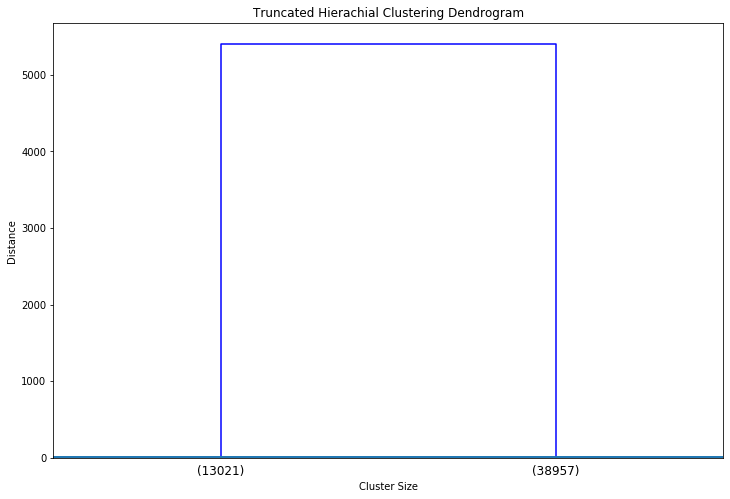

In [100]:
plt.figure(figsize = (12,8))
z = linkage(X,"ward")
#generate dendrogram
dendrogram(z,truncate_mode= "lastp", p =2)
plt.title("Truncated Hierachial Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
#divide the cluster
plt.axhline(y=15)
plt.axhline(5)
plt.axhline(10)
plt.show()

**The ROC curve for HAC can be seen below, It has an auc of 0.647**

AUC:0.6476784643273239


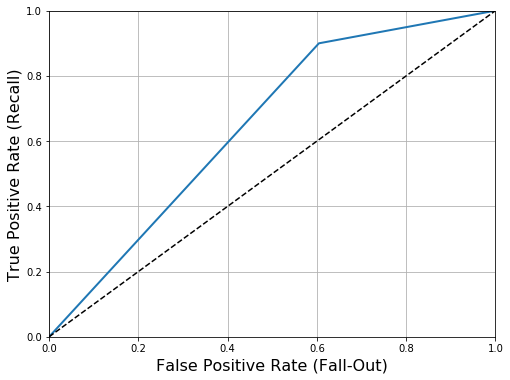

In [101]:
def plot_roc_curve(fpr, tpr, label=None):

    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])                                   
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
    plt.grid(True)  
    
fpr,tpr,_ = roc_curve(y,lab)
plt.figure(figsize=(8, 6))                     
plot_roc_curve(fpr, tpr)
print("AUC:{}".format(roc_auc_score(y, lab)))
plt.show()